## 1 Model estimation (1D)

## 1.1 an observation, a probability distribution

We wish to model (=estimate) a quantity $y$. 
We consider an observation $y^o$ of this quantity, entached of an error $e^o$, as a probability distribution.
The probability that the value $y^o$ is achieved, assuming a "model" value $y$, is called the likelyhood. 
It is described by a density distribution $p(y^o|y)$. 
In the following we shall consider unbiased Gaussian (or "normal") errors, which means that this probability takes the form 
\begin{equation}
%p(y|obs) = A \exp\left(-\frac{1}{2}\left(\frac{y-y^o}{\sigma^o}\right)^2\right)\,,
p(y^o|y) = A \exp\left(-\frac{1}{2}\left(\frac{y-y^o}{\sigma^o}\right)^2\right)\,,
\end{equation}
where $A$ is a prefactor (constant), and ${\sigma^o}^2=\mathbb{E}\left({e^o}^2\right)$ is the variance of the observation errors (considered as a Gaussian random variable). 
The notation $\mathbb{E}(\dots)$ stands for the statistical expectation. 
The fact errors are unbiased means $\mathbb{E}(e^o) = 0$: there is no off-set in the observation set-up. 
The fact $p$ is a probability distribution means $\int_{\infty}^{-\infty}p(y^o|y)  dy = 1$. 
This sets the prefactor $A=1 / \sigma^o\sqrt{2\pi}$.

In the real world, errors are never exactly Gaussian (there exist many possible distributions). However, as we shall see, this is overall a practicle approximation that allows to provide more "easily" a mathematical formulation... 


## 1.2 the a priori information, another probability distribution

Let assume that we look for the best estimate of a measured quantity, for instance the temperature today in Grenoble. 
A thermometer tells us $y^o=15^\circ$C, with a standard deviation $\sigma^o=2^\circ$C. 
We also have at hand some statistics about it (for instance, from measurements over the past decades): in november, it is in average $y^b = 7^\circ$C, with a standard deviation $\sigma^b=5^\circ$C (the subscript "b" stands here for "background", i.e. the prior information available before any measurement is done today).
In absence of any observation, the most likely estimate of the temperature is that it is as close as possible as what happened in the past, with uncertainties provided by statistics of the past series. 
If these are Gaussian, the probability distribution of the temperature without any measurements is then 
\begin{equation}
p(y) = \frac{1}{\sigma_b\sqrt{2\pi}} \exp\left(-\frac{1}{2}\left(\frac{y-y^b}{\sigma_b}\right)^2\right)\,.
\end{equation}

Now the question is: what is the most likely temperature estimate if we combine the information from the prior knowledge (statistics from the past) and from the thermometer today?

## 1.2 inferrence under observational and a priori constraints

To answer the above question, one must calculate $p(y|y^o)$, the probability of $y$ knowing the observation (plus the background values and their uncertainties, stored into $p(y)$), and find the value $y^*$ that maximize $p(y|y^o)$. 
In this quest, one can rely on Bayes' law. If the observation made today is independent of the past statistics (i.e., the system has a short memory), one can show that
\begin{equation}
p(y|y^o) \propto p(y^o|y) p(y) \,.
\end{equation}
It is provided in the Figure below.

**... with the example below, change the magnitude of the several errorbars:**
- **how does this affects the most probable estimate?**

<span style="color:#3498db">
smaller sigma_o, narrower peak, meaning less distribution of errors. The probable estimate is more precise.  </span>

<span style="color:#3498db">smaller sigma_b means smaller error margin in past data. Hence narrower peak. </span>

<span style="color:#3498db">The peak representing the probable temperature is a combination of the 2. Therefore if both have smaller error distributions, the peak is better centered and more precise. </span>


<span style="color:#3498db">Changing sigma_b has a greater effect on the probable estimate than changing sigma_o.</span>
   

- **what can you say about the uncertainty of the estimated field value?**

<span style="color:#3498db">
It is characterised by the uncertainties of both data. It depends how how precise the past and collected data is.
Is always less than the weakest uncertainty between the collected and past data.
Larger data pool, smaller uncertainty.<\span>



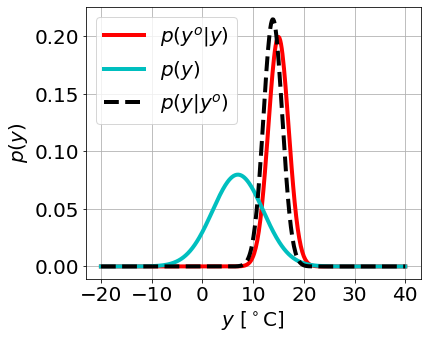

In [22]:
import os
#import geopandas as gpd
import numpy as np 
import matplotlib.pyplot as plt

y_o = 15
sigma_o = 2
y_b = 7
sigma_b = 5

ys = np.linspace(-20,40,400)
dy = ys[1]-ys[0]

py_o = np.exp(-0.5*((ys-y_o)/sigma_o)**2) / (sigma_o * np.sqrt(2*np.pi))
py_b = np.exp(-0.5*((ys-y_b)/sigma_b)**2) / (sigma_b * np.sqrt(2*np.pi))
py_ob_unscaled = py_o*py_b
norm_py_ob = np.sum(py_ob_unscaled*dy)
py_ob = py_ob_unscaled / norm_py_ob

my_fontsize = 20
plt.figure(figsize=(6,5))

plt.plot(ys,py_o,'r',label='$p(y^o|y)$',linewidth = 4)
plt.plot(ys,py_b,'c',label='$p(y)$',linewidth = 4)
plt.plot(ys,py_ob,'k--',label='$p(y|y^o)$',linewidth = 4)
plt.xlabel('$y$ [$^\circ$C]',fontsize=my_fontsize)
plt.ylabel('$p(y)$',fontsize=my_fontsize)
plt.grid()
plt.legend(fontsize=my_fontsize)
plt.xticks(fontsize=my_fontsize)
plt.yticks(fontsize=my_fontsize)

plt.show()



Then thank to the property $\exp(ab)=\exp(a)\exp(b)$, one has 
\begin{equation}
p(y|y^o) \propto \exp\left(-\frac{1}{2} \left[ \left(\frac{y-y^o}{\sigma^o}\right)^2 + \left(\frac{y-y^b}{\sigma^b}\right)^2\right]\right) \,.
\end{equation}
Here we do not care about the constant prefactors, because we are only interested in finding the value of $y$ that maximizes the above probability.
It will be found when the argument inside the exponential is the closest to 0, and comes down to finding $y$ such that the "cost function"
\begin{equation}
J(y) = \left(\frac{y-y^o}{\sigma^o}\right)^2 + \left(\frac{y-y^b}{\sigma^b}\right)^2
\end{equation}
is the closest to zero. $J$ is a quadratic function, we thus want to find where it is minimum. 

This can be achieved by finding the zero of the derivative of $J$: 
\begin{equation}
J'(y) = 2 \frac{y-y^o}{{\sigma^o}^2} + 2\frac{y-y^b}{{\sigma^b}^2}.
\end{equation}
One has 
\begin{equation}
J'(y) = 0 \Rightarrow \hat{y} = \frac{{\sigma^b}^2 y^o+{\sigma^o}^2 y^b}{{\sigma^o}^2+{\sigma^b}^2}\,,
\end{equation}
meaning that the most likely estimate of the temperature is a weighted average of the measurement and the background value (average of the historical records). 

One can also check that 
\begin{equation}
p(y|y^o) = \frac{1}{\hat{\sigma}\sqrt{2\pi}} \exp\left(-\frac{1}{2}\left(\frac{y-\hat{y}}{\hat{\sigma}}\right)^2\right)\,,
\end{equation}
which means that the posterior probability distribution (knowing the data and the prior), product of two Gaussian functions, is also a Gaussian, with an expectation $\hat{y}$ and a variance
\begin{equation}
\hat{\sigma}^2 = \frac{{\sigma^b}^2{\sigma^o}^2}{{\sigma^o}^2+{\sigma^b}^2}\,.
\end{equation}
When ${\sigma^o}^2\ll{\sigma^b}^2$, the posterior uncertainty is 
\begin{equation}
\hat{\sigma}^2 \simeq {\sigma^o}^2\left(1-\frac{{\sigma^o}^2}{{\sigma^b}^2}\right)<{\sigma^o}^2\,,
\end{equation}
meaning that the posterior errorbars are weaker than the data errors (we have learnt something by considering the information from the background). 


## 2 Solving a multivariate linear inverse problem


## 2.1 forward problem

We now turn to the case where we want to recover several unknowns, from a set of several observations. 
Lets write ${\bf x}$ the vector of unknowns, and ${\bf y}_o$ the observations, entached of errors ${\bf e}^o$. These are related through the forward relation 
\begin{equation}
{\bf y}_o = {\bf f}({\bf x}) + {\bf e}^o\,,
\end{equation}
If ${\bf y}_o$ and ${\bf x}$ are linearly related, it becomes
\begin{equation}
{\bf y} = {\sf H}{\bf x} + {\bf e}^o\,,
\end{equation}
where ${\sf H}=\nabla {\bf f}$ is a matrix of size $N\times P$, which elements are 
\begin{equation}
{\sf H}_{ij} = \partial f_i / \partial x_j\,.
\end{equation}

We first consider a case with three observations (${\bf y}^o = [y_1,y_2,y_3]$), and two unknowns ${\bf x} = [x_1,x_2]$), say the temperature in two different sites (Chambéry and Grenoble). In this configuration ${\sf H}$ is of dimension 3x2. 
The observations could be at any site, for instance the 1st two in Grenoble and the later in Chambery, in which case \begin{equation}
{\sf H}^T = \left[\begin{array}{3}
1 & 1 & 0 \\
0 & 0 & 1
\end{array}\right]\,,
\end{equation}
or all three in Chambery, which would give
\begin{equation}
{\sf H}^T = \left[\begin{array}{3}
0 & 0 & 0 \\
1 & 1 & 1
\end{array}\right]\,.
\end{equation}


## 2.2 cross-covariance matrices

In the case of multivariate model and data space (dimensions larger than one), some statistical information may be contained into the data error cross-covariance matrix ${\sf R} = \mathbb{E}\left({\bf e}^o{{\bf e}^o}^T\right)$, and the prior model cross-covariance matrix ${\sf P} = \mathbb{E}\left({\bf x}'{\bf x}'^T\right)$, with ${\bf x}^b$ the background vector state (which contain in the above case the average temperatures in Grenoble and Chambery), and ${\bf x}' = \left({\bf x}-{\bf x}^b\right)$. 

In the present example, the matrix ${\sf R}$ is of dimension 3x3, with elements ${\sf R}_{ij} = \mathbb{E}\left({e^o_i}{e^o_j}\right) = \mathbb{E}\left({e^o_j}{e^o_i}\right) = {\sf R}_{ji}$. It is positive definite (inversible, with all eigenvalues $>0$). In the case of decorrelated errors (errors made with the thermometer in Chambery have nothing to do with those made in Grenoble), $\mathbb{E}\left({e^o_j}{e^o_i}\right) = 0$ for $i\neq j$ and ${\sf R}$ is simply diagonal, with ${\sf R}_{ii} = {\sigma^o_i}^2$ being the variance of the $i^{th}$ data error. 

There is no reason to think that the patrix ${\sf P}$ should be diagonal. Indeed, the temperature between Grenoble and Chambery are strongly correlated, which should transpire into the statistics in ${\sf P}$. 
We note $\mathbb{E}\left(x_1'^2\right) = \sigma^2_{b,1}$ and $\mathbb{E}\left(x_2'^2\right) = \sigma^2_{b,2}$ the a priori model variance in the two sites, and 
\begin{equation}
\rho_{1,2} = \frac{\mathbb{E}\left(x_1'x_2'\right)}{\sigma_{b,1}\sigma_{b,2}}
\end{equation}
the correlation coefficient between the temperature at the two sites. Then  
\begin{equation}
{\sf P} = \left[\begin{array}{2}
\sigma_{b,1}^2 & \rho_{1,2}\sigma_{b,1}\sigma_{b,2} \\
\rho_{1,2}\sigma_{b,1}\sigma_{b,2} & \sigma_{b,2}^2
\end{array}\right]\,.
\end{equation}

**... now generate random bivariate samples:**

- **1st check that the mean and variances of the empirical samples are coherent with the one demanded.**
<span style="color:#3498db">Our empirical values and the mean and variance values provided are coherent with each other.</span>

- **play with the value of the std, the correlation, the mean, etc.**
<span style="color:#3498db">Increasing the number of samples causes our given and empirical values to be closer to each other. When the correlation variable is greater, there is a stronger correlation between the 2.
The closer the rho is to 1, we get closer to a linear regression and hence the empirical samples get closer to the one demanded. When the correlation between the 2 variables is significant, the 2 unknowns are proportional to each other to a greater degree and hence form elipses.

Increasing the standard deviations will result in wider margin of data. Decreasing them will lead to narrower spread of data, hence when the std is large the randomly generated data points may be further from the stated mean value. However in the given data, given that 300 samples is a finite and relatively small data pool, the empirical and given mean and std values remain relatively close.</span>
 
 
 

In [40]:
# function for generating bivariate, correlated random Gaussian variables
def bivariate_random(Nsamples, mu1, mu2, sigma1, sigma2, rho12):
    ##################################
    # entries: 
    #
    # outputs: 
    # 
    ##################################
    # generate random Gaussian series of unit variance & zero mean
    w1 = np.random.normal(0, 1, Nsamples)
    w2 = np.random.normal(0, 1, Nsamples)
    w1 = np.reshape(w1,(1,Nsamples))
    w2 = np.reshape(w2,(1,Nsamples))
    w = np.concatenate((w1,w2),axis = 0)
    # generate covariance matrix
    covar_matrix = np.zeros((2,2))
    covar_matrix[0,0] = sigma1**2
    covar_matrix[1,1] = sigma2**2
    covar_matrix[0,1] = rho12*sigma1*sigma2
    covar_matrix[1,0] = covar_matrix[0,1]
    # generate correlated samples from Choleski decomposition
    L = np.linalg.cholesky(covar_matrix) 
    ds = np.matmul(L,w)
    s = np.zeros((2,Nsamples))
    # add the mean
    s[0,:] = ds[0,:]+mu1
    s[1,:] = ds[1,:]+mu2
    return s

#####################
# function for calculating the cost function and the probability for bivariate, correlated Gaussian variables
def proba_bivariate(x1, x2, mu1, mu2, sigma1, sigma2, rho12):
    covar_matrix = np.zeros((2,2))
    covar_matrix[0,0] = sigma1**2
    covar_matrix[1,1] = sigma2**2
    covar_matrix[0,1] = rho12*sigma1*sigma2
    covar_matrix[1,0] = covar_matrix[0,1]
    inv_cov_mat = np.linalg.inv(covar_matrix)
    #print(in_cov_mat)
    mu = np.zeros((2,1))  
    mu[0] = mu1
    mu[1] = mu2
    my_x = np.zeros((2,1))  
    N1 = np.size(x1)
    N2 = np.size(x2)
    #my_proba = np.zeros((N1,N2))
    my_J = np.zeros((N1,N2))
    for i in range(N1):
        for j in range(N2):
            my_x[0] = x1[i]
            my_x[1] = x2[j]
            my_dx = my_x-mu
            invCdx = np.matmul(inv_cov_mat,my_dx)
            dxinvCdx = np.matmul(my_dx.T,invCdx)
            my_J[i,j] = dxinvCdx
            #print(i,j,my_proba[i,j],dxinvCdx)
    prefac_bivariee = 1/(2*np.pi*sigma1*sigma2*np.sqrt(1-rho12**2))
    my_proba = prefac_bivariee*np.exp(-0.5*my_J)
    return my_J,my_proba

#####################


300 300
empirical mean= [ 9.96684982 19.61654359]
empirical std = [ 5.14428602 20.64505219]


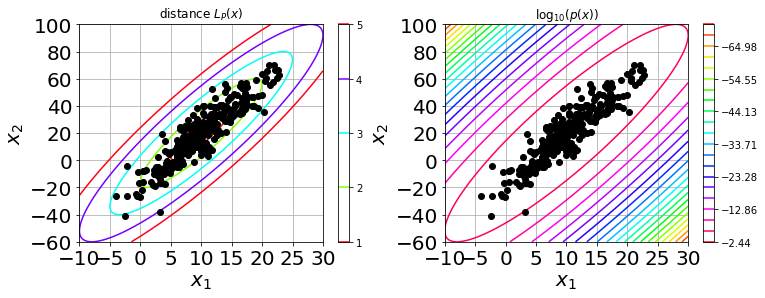

In [49]:
# generate random bivariate samples, plot them... 

Nsamples = 300
mu1 = 10
mu2 = 20
sigma1 = 5
sigma2 = 20
rho12 = 0.9

s = bivariate_random(Nsamples, mu1, mu2, sigma1, sigma2, rho12)

#print(s)
print(len(s[0]),len(s[1]))
# check the values for the mean and the std
print('empirical mean=', np.mean(s,axis=1))
print('empirical std =', np.std(s,axis=1))

# plot the samples & isolines of cost function

Nsigma = 4
my_x1s = np.linspace(mu1-Nsigma*sigma1, mu1+Nsigma*sigma1,100)
my_x2s = np.linspace(mu2-Nsigma*sigma2, mu2+Nsigma*sigma2,100)
my_J,my_proba = proba_bivariate(my_x1s, my_x2s, mu1, mu2, sigma1, sigma2, rho12)

L_P = np.sqrt(my_J)

x1_samples = s[0,:]
x2_samples = s[1,:]

my_fontsize=20

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
# plot the samples upon distance L_P(x), after removing average and normalizing by the std

tmp = np.linspace(1,5,5)
levels = tmp
plt.title('distance $L_P(x)}$')
plt.contour(my_x1s,my_x2s, L_P, levels, cmap='hsv') 
plt.plot(x1_samples,x2_samples,'ok')
plt.colorbar()
plt.grid()
plt.xticks(fontsize=my_fontsize)#, rotation=90)
plt.yticks(fontsize=my_fontsize)#, rotation=90)
plt.xlabel('$x_1$',fontsize=my_fontsize)
plt.ylabel('$x_2$',fontsize=my_fontsize)

plt.subplot(1,2,2)
# plot the samples upon probability function, after removing average and normalizing by the std
'''
dx1_samples = x1_samples-mu1
dx2_samples = x2_samples-mu2
dx1n_samples = dx1_samples/sigma1
dx2n_samples = dx2_samples/sigma2
'''
ZZ = np.log10(my_proba)
vmax = ZZ.max()
vmin = ZZ.min()
vdiff = (vmax-vmin)
dv = (vmax-vmin)/10
Nlev = int(((vmax-vmin)/dv)*2+1)
levels = np.linspace(vmin,vmax,Nlev)
plt.title('$\log_{10}(p(x))$')
plt.contour(my_x1s,my_x2s, ZZ, levels, cmap='hsv') 
plt.plot(x1_samples,x2_samples,'ok')
plt.colorbar()
plt.grid()
plt.xticks(fontsize=my_fontsize)
plt.yticks(fontsize=my_fontsize)
plt.xlabel('$x_1$',fontsize=my_fontsize)
plt.ylabel('$x_2$',fontsize=my_fontsize)
#plt.xlabel('$(x_1-\mu_1)/\sigma_1$',fontsize=my_fontsize)
#plt.ylabel('$(x_2-\mu_2)/\sigma_2$',fontsize=my_fontsize)

plt.show()

    



## 2.3 inverse problem

With the above notation, under the hypothesis of Gaussian statistics (characterized only by the mean and the variance), it is possible to estimate the most probable state knowing both the prior and observations. 
One can express the probability of a state ${\bf x}$ from the prior statistics as
\begin{equation}
p({\bf x}) \propto \exp\left(-\frac{1}{2} L_P^2({\bf x}) \right) \,, \,\mathrm{with }\,L_P^2({\bf x}) = \left({\bf x} - {\bf x}^b\right)^T {\sf P}^{-1}\left({\bf x} - {\bf x}^b\right)\,.
\end{equation}
and the probability of a set of observation given a state vector ${\bf x}$ as
\begin{equation}
p({\bf y}^o| {\bf x}) \propto \exp\left(-\frac{1}{2} L_R^2({\bf x})  \right)\,,\, \mathrm{with}\,L_R^2({\bf x}) = \left({\sf H}{\bf x} - {\bf y}^o\right)^T {\sf R}^{-1} \left({\sf H}{\bf x} - {\bf y}^o\right)\,.
\end{equation}
$L_P$ and $L_R$ can be seen as two normalized "distances", the first in the domain of the model parameters, and the second in the domain of the observations.  
The normalization for $L_P$ is operated using the a priori model covariances, while for for $L_R$ it is done using the data error covariances.  

Then the  probability of a state ${\bf x}$ knowing the observations  (following Bayes' law) is given by  
\begin{equation}
p({\bf x}|{\bf y}^o) \propto p({\bf y}^o| {\bf x})p({\bf x})\propto \exp\left(-\frac{1}{2} \left[
 L_P^2({\bf x}) + L_R^2({\bf x})
\right]\right) \,.
\end{equation}
Maximizing it requires to find the minimum of 
\begin{equation}
J({\bf x}) = L_P^2({\bf x}) +L_R^2({\bf x})\,,
\end{equation}
in which the 1st term is the normalized measure of the misfit to the data, and the second is the normalized distance to the background value. 
In this linear case, minimizing $J$ over all possible vectors ${\bf x}$ can be found for instance by calculating the solution to $\nabla J = \left[\partial J/\partial x_1, \partial J/\partial x_2\right] = 0$. This implies
\begin{equation}
\left({\sf H}^T {\sf R}^{-1} {\sf H} +  
{\sf P}^{-1}\right) \left({\bf x}-{\bf x}^b\right) =  {\sf H}^T {\sf R}^{-1}\left({\bf y}^o-{\sf H}{\bf x}^b\right)\,.
\end{equation}
which solution is 
\begin{equation}
\hat{\bf x} = {\bf x}^b + \left({\sf H}^T {\sf R}^{-1} {\sf H} +  
{\sf P}^{-1}\right)^{-1} {\sf H}^T {\sf R}^{-1}\left({\bf y}^o-{\sf H}{\bf x}^b\right)\,.
\end{equation}

**Now solve for some examples of estimation of the temperature in Grenoble and Clermont-Ferrand...**
- **vary the entries for the variances: what do you observe?**
- **adapt the forward operator ${\sf H}$ to vary the site of observations: what do you see?**
- **what happens if you only observe in a single site?**
- **what happens if a thermometer is damaged? (put very large errorbars)**
- **what happens if you observe many time in one site?**


In [24]:
Nobs = 3

# initialize prior model covariance matrix: units[P] = 1/degree^2
sigma_b1 = 7
sigma_b2 = 11
mu_b1 = 15
mu_b2 = 10
rho_b12 = 0.6

P = np.zeros((2,2))
P[0,0] = sigma_b1**2
P[1,1] = sigma_b2**2
P[0,1] = sigma_b1*sigma_b2*rho_b12
P[1,0] = P[0,1]

# initialize data error covariance matrix:  units[R] = 1/degree^2
# decorrelated errors => off-diagonal elements = 0
sigma_e1 = 1.0
sigma_e2 = 2.0
sigma_e3 = 4.0

R = np.zeros((Nobs,Nobs))
R[0,0] = sigma_e1**2
R[1,1] = sigma_e2**2
R[2,2] = sigma_e3**2

# build "true" or "reference" state from a random draw of the temperature in Grenoble and Clermont: 
L = np.linalg.cholesky(P) 
w = np.random.normal(0, 1, 2)
tmp = np.matmul(L,w)
xref = np.zeros((2,1))
xref[0,0] = tmp[0]+mu_b1
xref[1,0] = tmp[1]+mu_b2

print("reference (=true) temperatures:",xref[:,0])
# initialize observation operator: 3 obs x 2 unknowns
# units[H] = none
H = np.zeros((Nobs,2))
# case 1: 
# y_1 in Grenoble
H[0,0] = 1.
# y_2 in Clermont-Ferrand
H[1,1] = 1.
# y_3 in Clermont-Ferrand
H[2,1] = 1.

# build noisy observations from 
yo = np.zeros((Nobs,1))
yo[0] = xref[0,0] + np.random.normal(0, sigma_e1, 1) # in Grenoble
yo[1] = xref[1,0] + np.random.normal(0, sigma_e2, 1) # in Clermont
yo[2] = xref[1,0] + np.random.normal(0, sigma_e3, 1) # in Clermont

# build matrix to be inverted (called "Hessien"): 
invR = np.linalg.inv(R)
invP = np.linalg.inv(P)

xb = np.zeros((2,1))
xb[0] = mu_b1
xb[1] = mu_b2

HTinvR = np.matmul(H.T,invR)
HTinvRH = np.matmul(HTinvR,H)
Hessien = HTinvRH + invP
InvHessien = np.linalg.inv(Hessien)

Innov = np.matmul(HTinvR,yo-np.matmul(H,xb))
#print(yo)
#print(yo-np.matmul(H,xb))
#print(np.matmul(InvHessien,Innov))
xhat = xb + np.matmul(InvHessien,Innov)
print("inverted temperatures:",xhat[:,0])
print("observed temperatures:",yo[:,0])

yp = np.matmul(H,xhat)
print("model predictions to obs.:",yp[:,0])

# normalized misfit to obs: 
yp_err = yp-yo
tmp = np.matmul(yp_err.T,invR)
L_R2 = np.matmul(tmp,yp_err)
L_R = np.sqrt(L_R2)
print("normalized data misfit:",L_R[0])

# normalized distance to reference state: 
x_err = xhat-xref
tmp = np.matmul(x_err.T,invP)
L_P2 = np.matmul(tmp,x_err)
L_P = np.sqrt(L_P2)
print("normalized model misfit to the background:",L_P[0])


reference (=true) temperatures: [9.7183463  8.08901391]
inverted temperatures: [9.70477578 8.26810293]
observed temperatures: [ 9.55700938  7.38931804 12.45694971]
model predictions to obs.: [9.70477578 8.26810293 8.26810293]
normalized data misfit: [1.14523053]
normalized model misfit to the background: [0.02189102]


In [53]:
Nobs = 3

# initialize prior model covariance matrix: units[P] = 1/degree^2
sigma_b1 = 20
sigma_b2 = 19
mu_b1 = 15
mu_b2 = 10
rho_b12 = 0.6

P = np.zeros((2,2))
P[0,0] = sigma_b1**2
P[1,1] = sigma_b2**2
P[0,1] = sigma_b1*sigma_b2*rho_b12
P[1,0] = P[0,1]

# initialize data error covariance matrix:  units[R] = 1/degree^2
# decorrelated errors => off-diagonal elements = 0
sigma_e1 = 1.0
sigma_e2 = 2.0
sigma_e3 = 4.0

R = np.zeros((Nobs,Nobs))
R[0,0] = sigma_e1**2
R[1,1] = sigma_e2**2
R[2,2] = sigma_e3**2

# build "true" or "reference" state from a random draw of the temperature in Grenoble and Clermont: 
L = np.linalg.cholesky(P) 
w = np.random.normal(0, 1, 2)
tmp = np.matmul(L,w)
xref = np.zeros((2,1))
xref[0,0] = tmp[0]+mu_b1
xref[1,0] = tmp[1]+mu_b2

print("reference (=true) temperatures:",xref[:,0])
# initialize observation operator: 3 obs x 2 unknowns
# units[H] = none
H = np.zeros((Nobs,2))
# case 1: 
# y_1 in Grenoble
H[0,0] = 1.
# y_2 in Clermont-Ferrand
H[1,1] = 0.
# y_3 in Clermont-Ferrand
H[2,1] = 0.





# build noisy observations from 
yo = np.zeros((Nobs,1))
yo[0] = xref[0,0] + np.random.normal(0, sigma_e1, 1) # in Grenoble
yo[1] = xref[1,0] + np.random.normal(0, sigma_e2, 1) # in Clermont
yo[2] = xref[1,0] + np.random.normal(0, sigma_e3, 1) # in Clermont

# build matrix to be inverted (called "Hessien"): 
invR = np.linalg.inv(R)
invP = np.linalg.inv(P)

xb = np.zeros((2,1))
xb[0] = mu_b1
xb[1] = mu_b2

HTinvR = np.matmul(H.T,invR)
HTinvRH = np.matmul(HTinvR,H)
Hessien = HTinvRH + invP
InvHessien = np.linalg.inv(Hessien)

Innov = np.matmul(HTinvR,yo-np.matmul(H,xb))
#print(yo)
#print(yo-np.matmul(H,xb))
#print(np.matmul(InvHessien,Innov))
xhat = xb + np.matmul(InvHessien,Innov)
print("inverted temperatures:",xhat[:,0])
print("observed temperatures:",yo[:,0])

yp = np.matmul(H,xhat)
print("model predictions to obs.:",yp[:,0])

# normalized misfit to obs: 
yp_err = yp-yo
tmp = np.matmul(yp_err.T,invR)
L_R2 = np.matmul(tmp,yp_err)
L_R = np.sqrt(L_R2)
print("normalized data misfit:",L_R[0])

# normalized distance to reference state: 
x_err = xhat-xref
tmp = np.matmul(x_err.T,invP)
L_P2 = np.matmul(tmp,x_err)
L_P = np.sqrt(L_P2)
print("normalized model misfit to the background:",L_P[0])

reference (=true) temperatures: [20.83042291  7.22451368]
inverted temperatures: [20.68066798 13.23798075]
observed temperatures: [20.69486965  7.80081271  8.0899742 ]
model predictions to obs.: [20.68066798  0.          0.        ]
normalized data misfit: [4.39361487]
normalized model misfit to the background: [0.4013085]


In [50]:
Nobs = 5

# initialize prior model covariance matrix: units[P] = 1/degree^2
sigma_b1 = 7
sigma_b2 = 11
mu_b1 = 15
mu_b2 = 10
rho_b12 = 0.9

P = np.zeros((2,2))
P[0,0] = sigma_b1**2
P[1,1] = sigma_b2**2
P[0,1] = sigma_b1*sigma_b2*rho_b12
P[1,0] = P[0,1]

# initialize data error covariance matrix:  units[R] = 1/degree^2
# decorrelated errors => off-diagonal elements = 0
sigma_e1 = 1.0
sigma_e2 = 2.0
sigma_e3 = 4.0
sigma_e4 = 5.0
sigma_e5 = 6.0
R = np.zeros((Nobs,Nobs))
R[0,0] = sigma_e1**2
R[1,1] = sigma_e2**2
R[2,2] = sigma_e3**2
R[3,3] = sigma_e4**2
R[4,4] = sigma_e5**2

# build "true" or "reference" state from a random draw of the temperature in Grenoble and Clermont: 
L = np.linalg.cholesky(P) 
w = np.random.normal(0, 1, 2)
tmp = np.matmul(L,w)
xref = np.zeros((2,1))
xref[0,0] = tmp[0]+mu_b1
xref[1,0] = tmp[1]+mu_b2

print("reference (=true) temperatures:",xref[:,0])
# initialize observation operator: 3 obs x 2 unknowns
# units[H] = none
H = np.zeros((Nobs,2))
# All observations in Grenoble
H[0, :] = 1.0

# Generate noisy observations at Grenoble
yo = np.zeros((Nobs, 1))
for i in range(Nobs):
    yo[i] = xref[0, 0] + np.random.normal(0, sigma_e1, 1)


# build matrix to be inverted (called "Hessien"): 
invR = np.linalg.inv(R)
invP = np.linalg.inv(P)

xb = np.zeros((2,1))
xb[0] = mu_b1
xb[1] = mu_b2

HTinvR = np.matmul(H.T,invR)
HTinvRH = np.matmul(HTinvR,H)
Hessien = HTinvRH + invP
InvHessien = np.linalg.inv(Hessien)

Innov = np.matmul(HTinvR,yo-np.matmul(H,xb))
#print(yo)
#print(yo-np.matmul(H,xb))
#print(np.matmul(InvHessien,Innov))
xhat = xb + np.matmul(InvHessien,Innov)
print("inverted temperatures:",xhat[:,0])
print("observed temperatures:",yo[:,0])

yp = np.matmul(H,xhat)
print("model predictions to obs.:",yp[:,0])

# normalized misfit to obs: 
yp_err = yp-yo
tmp = np.matmul(yp_err.T,invR)
L_R2 = np.matmul(tmp,yp_err)
L_R = np.sqrt(L_R2)
print("normalized data misfit:",L_R[0])

# normalized distance to reference state: 
x_err = xhat-xref
tmp = np.matmul(x_err.T,invP)
L_P2 = np.matmul(tmp,x_err)
L_P = np.sqrt(L_P2)
print("normalized model misfit to the background:",L_P[0])


reference (=true) temperatures: [18.25508858 14.59099696]
inverted temperatures: [12.91954819  6.65333914]
observed temperatures: [19.55530109 16.82158473 19.07176823 18.73482093 18.58478316]
model predictions to obs.: [19.57288733  0.          0.          0.          0.        ]
normalized data misfit: [10.82169265]
normalized model misfit to the background: [0.76658491]



<span style="color:#3498db">


Ques 1:
Changing the variances for observations and prior information affects the estimated temperatures. 
Smaller variances : More precise data ,  larger variances : more uncertainty.

Ques 2: Adapting the Forward Operator H:

Results in different estimates based on the available data. Setting one matrix value to 0, increased all the model predictions, with the exception the value found at that position in the observed temperatures matrix.

Ques 3: Observing Only in a Single Site:

Limited information to estimate temperatures in both Grenoble and Clermont-Ferrand.
The estimate will primarily depend on the single observation.
Relatively high data misfit.

Ques 4: Damaged Thermometer (Large Error Bars):
        
The data misfit is very high. A damaged thermometer would introduce a large error into the observed data. 
Hence the error bars will be very large (higher sigma due to larger distribution of errors.  
The observation data will have a much hugher uncertainty.
Hence the estimate will also be less reliable and have a large error margin.


Ques 5: Observing Many Times in One Site:

It can lead to a more precise estimate. 
It allows the program to have more information about the temperature at that site. 
If multiple observations are about the same, the estmate will be even more precise as the margin of error in observation data is lower. 
Multiple observations, significantly reduces the risk of errors.
</span>